# Exploration des Données - Northwind Database

Ce notebook effectue une analyse exploratoire complète des données brutes extraites de SQL Server et Access.

**Contenu:**
1. Exploration des données brutes (première vue)
2. Statistiques descriptives (moyenne, médiane, distribution)
3. Détection des valeurs manquantes/anomalies
4. Compréhension des relations entre variables
5. Premières visualisations simples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
RAW_DIR = "../data/raw"

---
## 1.  Exploration des Données Brutes (Première Vue)
Chargement et aperçu initial de toutes les tables disponibles.

In [2]:
# Charger tous les fichiers CSV
def load_all_tables():
    tables = {}
    for file in glob.glob(os.path.join(RAW_DIR, "*.csv")):
        name = os.path.basename(file).replace('.csv', '')
        tables[name] = pd.read_csv(file)
    return tables

tables = load_all_tables()
print(f" {len(tables)} tables chargées:")
for name, df in tables.items():
    print(f"  • {name}: {df.shape[0]} lignes, {df.shape[1]} colonnes")

 18 tables chargées:
  • access_customers: 29 lignes, 18 colonnes
  • access_employees: 9 lignes, 18 colonnes
  • access_orders: 48 lignes, 20 colonnes
  • access_order_details: 58 lignes, 10 colonnes
  • access_products: 45 lignes, 14 colonnes
  • access_shippers: 3 lignes, 18 colonnes
  • access_suppliers: 10 lignes, 18 colonnes
  • sql_categories: 8 lignes, 4 colonnes
  • sql_customers: 91 lignes, 11 colonnes
  • sql_employees: 9 lignes, 18 colonnes
  • sql_employeeterritories: 49 lignes, 2 colonnes
  • sql_orders: 830 lignes, 14 colonnes
  • sql_order_details: 2155 lignes, 5 colonnes
  • sql_products: 77 lignes, 10 colonnes
  • sql_region: 4 lignes, 2 colonnes
  • sql_shippers: 3 lignes, 3 colonnes
  • sql_suppliers: 29 lignes, 12 colonnes
  • sql_territories: 53 lignes, 3 colonnes


In [3]:
# Tables principales pour l'analyse
orders = tables.get('access_orders', tables.get('sql_orders'))
order_details = tables.get('access_order_details', tables.get('sql_order_details'))
customers = tables.get('access_customers', tables.get('sql_customers'))
products = tables.get('access_products', tables.get('sql_products'))
employees = tables.get('access_employees', tables.get('sql_employees'))

print("\n Aperçu des commandes (Orders):")
display(orders.head(3))


 Aperçu des commandes (Orders):


,Order ID,Employee ID,Customer ID,Order Date,Shipped Date,Shipper ID,Ship Name,Ship Address,Ship City,Ship State/Province,Ship ZIP/Postal Code,Ship Country/Region,Shipping Fee,Taxes,Payment Type,Paid Date,Notes,Tax Rate,Tax Status,Status ID
0,30,9,27,2006-01-15 00:00:00,2006-01-22,2.0,Karen Toh,789 27th Street,Las Vegas,NV,99999,USA,200.0,0.0,Check,2006-01-15,NaN,0.0,NaN,3
1,31,3,4,2006-01-20 00:00:00,2006-01-22,1.0,Christina Lee,123 4th Street,New York,NY,99999,USA,5.0,0.0,Credit Card,2006-01-20,NaN,0.0,NaN,3
2,32,4,12,2006-01-22 00:00:00,2006-01-22,2.0,John Edwards,123 12th Street,Las Vegas,NV,99999,USA,5.0,0.0,Credit Card,2006-01-22,NaN,0.0,NaN,3


In [4]:
print("\n Aperçu des détails de commandes (Order Details):")
display(order_details.head(3))


 Aperçu des détails de commandes (Order Details):


,ID,Order ID,Product ID,Quantity,Unit Price,Discount,Status ID,Date Allocated,Purchase Order ID,Inventory ID
0,27,30,34,100.0,14.0,0.0,2,NaN,96.0,83.0
1,28,30,80,30.0,3.5,0.0,2,NaN,NaN,63.0
2,29,31,7,10.0,30.0,0.0,2,NaN,NaN,64.0


In [5]:
print("\n Aperçu des produits (Products):")
display(products.head(3))


 Aperçu des produits (Products):


,Supplier IDs,ID,Product Code,Product Name,Description,Standard Cost,List Price,Reorder Level,Target Level,Quantity Per Unit,Discontinued,Minimum Reorder Quantity,Category,Attachments
0,4,1,NWTB-1,Northwind Traders Chai,NaN,13.5,18.0,10,40,10 boxes x 20 bags,False,10.0,Beverages,NaN
1,10,3,NWTCO-3,Northwind Traders Syrup,NaN,7.5,10.0,25,100,12 - 550 ml bottles,False,25.0,Condiments,NaN
2,10,4,NWTCO-4,Northwind Traders Cajun Seasoning,NaN,16.5,22.0,10,40,48 - 6 oz jars,False,10.0,Condiments,NaN


---
## 2.  Statistiques Descriptives
Analyse des mesures de tendance centrale et de dispersion.

In [6]:
def descriptive_stats(df, name):
    """Calcule les statistiques descriptives pour les colonnes numériques."""
    print(f"\n{'='*60}")
    print(f" Statistiques Descriptives: {name}")
    print(f"{'='*60}")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print("Aucune colonne numérique.")
        return
    
    stats = df[numeric_cols].agg(['count', 'mean', 'median', 'std', 'min', 'max']).T
    stats.columns = ['Count', 'Moyenne', 'Médiane', 'Écart-type', 'Min', 'Max']
    display(stats.round(2))
    return stats

In [7]:
# Statistiques pour les commandes
descriptive_stats(orders, 'Orders')


 Statistiques Descriptives: Orders


,Count,Moyenne,Médiane,Écart-type,Min,Max
Order ID,48.0,55.79,57.5,15.74,30.0,81.0
Employee ID,48.0,4.46,4.0,3.05,1.0,9.0
Customer ID,48.0,12.85,8.5,9.82,1.0,29.0
Shipper ID,43.0,2.21,2.0,0.74,1.0,3.0
Ship ZIP/Postal Code,48.0,99999.00,99999.0,0.00,99999.0,99999.0
Shipping Fee,48.0,44.54,7.0,78.04,0.0,300.0
Taxes,48.0,0.00,0.0,0.00,0.0,0.0
Notes,0.0,NaN,NaN,NaN,NaN,NaN
Tax Rate,48.0,0.00,0.0,0.00,0.0,0.0
Tax Status,0.0,NaN,NaN,NaN,NaN,NaN


,Count,Moyenne,Médiane,Écart-type,Min,Max
Order ID,48.0,55.791667,57.5,15.741203,30.0,81.0
Employee ID,48.0,4.458333,4.0,3.045459,1.0,9.0
Customer ID,48.0,12.854167,8.5,9.815293,1.0,29.0
Shipper ID,43.0,2.209302,2.0,0.741881,1.0,3.0
Ship ZIP/Postal Code,48.0,99999.000000,99999.0,0.000000,99999.0,99999.0
Shipping Fee,48.0,44.541667,7.0,78.040894,0.0,300.0
Taxes,48.0,0.000000,0.0,0.000000,0.0,0.0
Notes,0.0,NaN,NaN,NaN,NaN,NaN
Tax Rate,48.0,0.000000,0.0,0.000000,0.0,0.0
Tax Status,0.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Statistiques pour les détails de commandes
descriptive_stats(order_details, 'Order Details')


 Statistiques Descriptives: Order Details


,Count,Moyenne,Médiane,Écart-type,Min,Max
ID,58.0,57.26,55.5,18.78,27.00,91.0
Order ID,58.0,52.36,47.5,16.39,30.00,81.0
Product ID,58.0,38.55,41.0,25.73,1.00,81.0
Quantity,58.0,50.72,27.5,70.63,0.00,300.0
Unit Price,58.0,22.27,18.0,16.90,2.99,81.0
Discount,58.0,0.00,0.0,0.00,0.00,0.0
Status ID,58.0,1.90,2.0,0.58,0.00,5.0
Date Allocated,0.0,NaN,NaN,NaN,NaN,NaN
Purchase Order ID,15.0,103.07,103.0,4.59,96.00,111.0
Inventory ID,56.0,100.80,100.0,23.27,63.00,136.0


,Count,Moyenne,Médiane,Écart-type,Min,Max
ID,58.0,57.258621,55.5,18.779011,27.00,91.0
Order ID,58.0,52.362069,47.5,16.390732,30.00,81.0
Product ID,58.0,38.551724,41.0,25.730842,1.00,81.0
Quantity,58.0,50.724138,27.5,70.631436,0.00,300.0
Unit Price,58.0,22.271724,18.0,16.902057,2.99,81.0
Discount,58.0,0.000000,0.0,0.000000,0.00,0.0
Status ID,58.0,1.896552,2.0,0.583085,0.00,5.0
Date Allocated,0.0,NaN,NaN,NaN,NaN,NaN
Purchase Order ID,15.0,103.066667,103.0,4.589844,96.00,111.0
Inventory ID,56.0,100.803571,100.0,23.272629,63.00,136.0


In [9]:
# Statistiques pour les produits
descriptive_stats(products, 'Products')


 Statistiques Descriptives: Products


,Count,Moyenne,Médiane,Écart-type,Min,Max
ID,45.0,57.93,66.0,33.75,1.0,99.00
Description,0.0,NaN,NaN,NaN,NaN,NaN
Standard Cost,45.0,11.68,7.5,12.69,0.5,60.75
List Price,45.0,15.85,10.0,16.74,1.2,81.00
Reorder Level,45.0,22.44,10.0,23.44,5.0,100.00
Target Level,45.0,69.56,40.0,50.51,20.0,200.00
Minimum Reorder Quantity,30.0,15.00,10.0,8.30,5.0,30.00
Attachments,0.0,NaN,NaN,NaN,NaN,NaN


,Count,Moyenne,Médiane,Écart-type,Min,Max
ID,45.0,57.933333,66.0,33.750017,1.0,99.00
Description,0.0,NaN,NaN,NaN,NaN,NaN
Standard Cost,45.0,11.682500,7.5,12.689461,0.5,60.75
List Price,45.0,15.845778,10.0,16.743022,1.2,81.00
Reorder Level,45.0,22.444444,10.0,23.442924,5.0,100.00
Target Level,45.0,69.555556,40.0,50.506775,20.0,200.00
Minimum Reorder Quantity,30.0,15.000000,10.0,8.304548,5.0,30.00
Attachments,0.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Distribution des prix des produits
if 'List Price' in products.columns:
    price_col = 'List Price'
elif 'UnitPrice' in products.columns:
    price_col = 'UnitPrice'
else:
    price_col = None

if price_col:
    print(f"\n Distribution des {price_col}:")
    print(f"  Moyenne: {products[price_col].mean():.2f}")
    print(f"  Médiane: {products[price_col].median():.2f}")
    print(f"  Mode: {products[price_col].mode().iloc[0]:.2f}")
    print(f"  Écart-type: {products[price_col].std():.2f}")


 Distribution des List Price:
  Moyenne: 15.85
  Médiane: 10.00
  Mode: 4.00
  Écart-type: 16.74


---
## 3.  Détection des Valeurs Manquantes et Anomalies
Identification des données incomplètes et des valeurs aberrantes.

In [11]:
def missing_values_analysis(df, name):
    """Analyse des valeurs manquantes."""
    print(f"\n{'='*60}")
    print(f" Valeurs Manquantes: {name}")
    print(f"{'='*60}")
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Valeurs Manquantes': missing,
        'Pourcentage (%)': missing_pct
    })
    
    # Filtrer les colonnes avec des valeurs manquantes
    missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0]
    
    if len(missing_df) == 0:
        print("✅ Aucune valeur manquante!")
    else:
        display(missing_df.sort_values('Pourcentage (%)', ascending=False))
    
    return missing_df

In [12]:
# Analyse des valeurs manquantes pour chaque table principale
missing_orders = missing_values_analysis(orders, 'Orders')
missing_details = missing_values_analysis(order_details, 'Order Details')
missing_products = missing_values_analysis(products, 'Products')
missing_customers = missing_values_analysis(customers, 'Customers')


 Valeurs Manquantes: Orders


,Valeurs Manquantes,Pourcentage (%)
Notes,48,100.00
Tax Status,48,100.00
Paid Date,10,20.83
Payment Type,10,20.83
Shipped Date,9,18.75
Shipper ID,5,10.42



 Valeurs Manquantes: Order Details


,Valeurs Manquantes,Pourcentage (%)
Date Allocated,58,100.00
Purchase Order ID,43,74.14
Inventory ID,2,3.45



 Valeurs Manquantes: Products


,Valeurs Manquantes,Pourcentage (%)
Description,45,100.00
Attachments,45,100.00
Minimum Reorder Quantity,15,33.33
Quantity Per Unit,5,11.11



 Valeurs Manquantes: Customers


,Valeurs Manquantes,Pourcentage (%)
E-mail Address,29,100.0
Home Phone,29,100.0
Mobile Phone,29,100.0
Web Page,29,100.0
Notes,29,100.0
Attachments,29,100.0


In [13]:
def detect_anomalies(df, name):
    """Détection des anomalies avec la méthode IQR."""
    print(f"\n{'='*60}")
    print(f" Détection des Anomalies (IQR): {name}")
    print(f"{'='*60}")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    anomalies_summary = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        if len(outliers) > 0:
            anomalies_summary.append({
                'Colonne': col,
                'Nb Anomalies': len(outliers),
                'Min Anomalie': outliers.min(),
                'Max Anomalie': outliers.max()
            })
    
    if anomalies_summary:
        display(pd.DataFrame(anomalies_summary))
    else:
        print(" Aucune anomalie détectée.")
    
    return anomalies_summary

In [14]:
# Détection des anomalies
detect_anomalies(order_details, 'Order Details')
detect_anomalies(products, 'Products')


 Détection des Anomalies (IQR): Order Details


,Colonne,Nb Anomalies,Min Anomalie,Max Anomalie
0,Quantity,8,100.0,300.0
1,Unit Price,1,81.0,81.0
2,Status ID,9,0.0,5.0



 Détection des Anomalies (IQR): Products


,Colonne,Nb Anomalies,Min Anomalie,Max Anomalie
0,Standard Cost,2,39.75,60.75
1,List Price,2,53.00,81.00
2,Reorder Level,5,50.00,100.00
3,Target Level,4,200.00,200.00


[{'Colonne': 'Standard Cost',
  'Nb Anomalies': 2,
  'Min Anomalie': np.float64(39.75),
  'Max Anomalie': np.float64(60.75)},
 {'Colonne': 'List Price',
  'Nb Anomalies': 2,
  'Min Anomalie': np.float64(53.0),
  'Max Anomalie': np.float64(81.0)},
 {'Colonne': 'Reorder Level',
  'Nb Anomalies': 5,
  'Min Anomalie': np.int64(50),
  'Max Anomalie': np.int64(100)},
 {'Colonne': 'Target Level',
  'Nb Anomalies': 4,
  'Min Anomalie': np.int64(200),
  'Max Anomalie': np.int64(200)}]

---
## 4.  Compréhension des Relations entre Variables
Analyse des corrélations et des liens entre les entités.

In [15]:
# Matrice de corrélation pour les détails de commandes
print(" Matrice de Corrélation - Order Details")
numeric_details = order_details.select_dtypes(include=[np.number])
if len(numeric_details.columns) > 1:
    correlation = numeric_details.corr()
    display(correlation.round(2))

 Matrice de Corrélation - Order Details


,ID,Order ID,Product ID,Quantity,Unit Price,Discount,Status ID,Date Allocated,Purchase Order ID,Inventory ID
ID,1.00,0.91,0.04,-0.23,0.15,NaN,0.10,NaN,0.98,0.94
Order ID,0.91,1.00,-0.00,-0.22,0.16,NaN,0.10,NaN,0.98,0.86
Product ID,0.04,-0.00,1.00,0.09,-0.29,NaN,-0.03,NaN,-0.06,-0.05
Quantity,-0.23,-0.22,0.09,1.00,0.04,NaN,-0.06,NaN,-0.32,-0.10
Unit Price,0.15,0.16,-0.29,0.04,1.00,NaN,-0.16,NaN,0.08,0.18
Discount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status ID,0.10,0.10,-0.03,-0.06,-0.16,NaN,1.00,NaN,0.06,0.06
Date Allocated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Order ID,0.98,0.98,-0.06,-0.32,0.08,NaN,0.06,NaN,1.00,0.73
Inventory ID,0.94,0.86,-0.05,-0.10,0.18,NaN,0.06,NaN,0.73,1.00


In [16]:
# Analyse des relations: Commandes par client
if 'Customer ID' in orders.columns:
    customer_col = 'Customer ID'
elif 'CustomerID' in orders.columns:
    customer_col = 'CustomerID'
else:
    customer_col = None

if customer_col:
    orders_per_customer = orders[customer_col].value_counts()
    print("\n Distribution des commandes par client:")
    print(f"  Moyenne: {orders_per_customer.mean():.2f} commandes/client")
    print(f"  Médiane: {orders_per_customer.median():.2f} commandes/client")
    print(f"  Max: {orders_per_customer.max()} commandes")
    print(f"\nTop 5 clients:")
    display(orders_per_customer.head(5))


 Distribution des commandes par client:
  Moyenne: 3.20 commandes/client
  Médiane: 2.00 commandes/client
  Max: 6 commandes

Top 5 clients:


Customer ID
8     6
6     6
4     5
29    4
28    4
Name: count, dtype: int64

In [17]:
# Analyse des relations: Commandes par employé
if 'Employee ID' in orders.columns:
    emp_col = 'Employee ID'
elif 'EmployeeID' in orders.columns:
    emp_col = 'EmployeeID'
else:
    emp_col = None

if emp_col:
    orders_per_employee = orders[emp_col].value_counts()
    print("\n Distribution des commandes par employé:")
    print(f"  Moyenne: {orders_per_employee.mean():.2f} commandes/employé")
    print(f"  Médiane: {orders_per_employee.median():.2f} commandes/employé")
    display(orders_per_employee)


 Distribution des commandes par employé:
  Moyenne: 6.00 commandes/employé
  Médiane: 5.00 commandes/employé


Employee ID
1    12
9    10
4     8
3     6
6     4
2     4
8     2
7     2
Name: count, dtype: int64

In [18]:
# Analyse des relations: Produits par catégorie
if 'Category' in products.columns:
    cat_col = 'Category'
elif 'CategoryID' in products.columns:
    cat_col = 'CategoryID'
else:
    cat_col = None

if cat_col:
    products_per_category = products[cat_col].value_counts()
    print("\n Produits par catégorie:")
    display(products_per_category)


 Produits par catégorie:


Category
Canned Fruit & Vegetables    8
Beverages                    5
Dried Fruit & Nuts           5
Baked Goods & Mixes          4
Condiments                   3
Sauces                       3
Soups                        3
Canned Meat                  3
Cereal                       2
Jams, Preserves              2
Pasta                        2
Oil                          1
Grains                       1
Candy                        1
Dairy Products               1
Chips, Snacks                1
Name: count, dtype: int64

---
## 5.  Premières Visualisations Simples
Graphiques exploratoires: statut de livraison et commandes par employé.

In [19]:
# Préparation des données de livraison
# Déterminer la colonne employé
if 'Employee ID' in orders.columns:
    emp_col = 'Employee ID'
elif 'EmployeeID' in orders.columns:
    emp_col = 'EmployeeID'
else:
    emp_col = None

# Créer la colonne de statut de livraison
if 'Shipped Date' in orders.columns:
    shipped_col = 'Shipped Date'
elif 'ShippedDate' in orders.columns:
    shipped_col = 'ShippedDate'
else:
    shipped_col = None

if shipped_col:
    orders['Livré'] = orders[shipped_col].notna().map({True: 'Livré', False: 'Non Livré'})

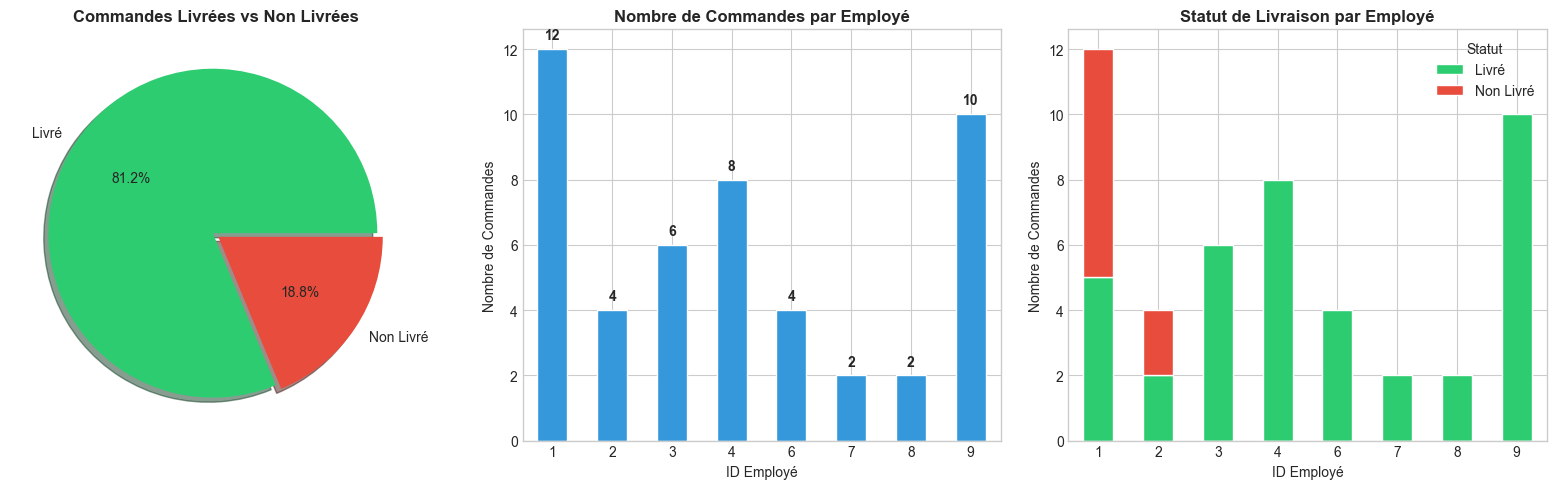

In [20]:
# Visualisations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Commandes Livrées vs Non Livrées (Pie Chart)
if shipped_col:
    delivery_counts = orders['Livré'].value_counts()
    colors = ['#2ecc71', '#e74c3c']  # Vert pour livré, Rouge pour non livré
    axes[0].pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', 
                colors=colors, explode=[0.02, 0.02], shadow=True)
    axes[0].set_title('Commandes Livrées vs Non Livrées', fontsize=12, fontweight='bold')

# 2. Nombre de Commandes par Employé (Bar Chart)
if emp_col:
    orders_per_emp = orders[emp_col].value_counts().sort_index()
    orders_per_emp.plot(kind='bar', ax=axes[1], color='#3498db', edgecolor='white')
    axes[1].set_title('Nombre de Commandes par Employé', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('ID Employé')
    axes[1].set_ylabel('Nombre de Commandes')
    axes[1].tick_params(axis='x', rotation=0)
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(orders_per_emp.values):
        axes[1].text(i, v + 0.3, str(v), ha='center', fontweight='bold')

# 3. Statut de Livraison par Employé (Stacked Bar Chart)
if emp_col and shipped_col:
    delivery_by_emp = orders.groupby([emp_col, 'Livré']).size().unstack(fill_value=0)
    delivery_by_emp.plot(kind='bar', stacked=True, ax=axes[2], 
                          color=['#2ecc71', '#e74c3c'], edgecolor='white')
    axes[2].set_title('Statut de Livraison par Employé', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('ID Employé')
    axes[2].set_ylabel('Nombre de Commandes')
    axes[2].tick_params(axis='x', rotation=0)
    axes[2].legend(title='Statut')

plt.tight_layout()
plt.show()